In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
from datetime import datetime, timedelta

In [2]:
recession = pd.read_csv("Recession Quarterly.csv", parse_dates=True)

In [3]:
recession.head()

,DATE,USRECQ,UNEMP,PPI,GDP,STOCKS
0,1854-10-01,1,NaN,NaN,NaN,NaN
1,1855-01-01,0,NaN,NaN,NaN,NaN
2,1855-04-01,0,NaN,NaN,NaN,NaN
3,1855-07-01,0,NaN,NaN,NaN,NaN
4,1855-10-01,0,NaN,NaN,NaN,NaN


In [20]:
recession.DATE = pd.to_datetime(recession.DATE)
#recession['YEAR'] = pd.PeriodIndex(recession.DATE, freq='Q').strftime('Y%')
recession['QUARTER'] = pd.PeriodIndex(recession.DATE, freq='Q').strftime('Q%q')
recession.replace(np.nan, 0, inplace = True)
recession.tail()

,DATE,USRECQ,UNEMP,PPI,GDP,STOCKS,QUARTER
669,2022-01-01,0,3.800000,4.69418,1.60728,-4.08296,Q1
670,2022-04-01,0,3.600000,7.86232,2.05330,-8.52256,Q2
671,2022-07-01,0,3.566667,-1.11063,1.88314,-2.91799,Q3
672,2022-10-01,0,3.600000,-2.91200,1.60959,-3.38433,Q4
673,2023-01-01,0,3.500000,-1.29837,0.00000,3.91445,Q1


In [21]:
recession.corr().style.background_gradient(cmap='coolwarm')

,USRECQ,UNEMP,PPI,GDP,STOCKS
USRECQ,1.000000,-0.232217,-0.274905,-0.363654,-0.278738
UNEMP,-0.232217,1.000000,0.097055,0.576595,0.138086
PPI,-0.274905,0.097055,1.000000,0.256897,0.166537
GDP,-0.363654,0.576595,0.256897,1.000000,0.162927
STOCKS,-0.278738,0.138086,0.166537,0.162927,1.000000


We can see a high correlation between the following columns in order of highly correlated to moderately correlated:
1. GDP and Unemployment
2. PPI and GDP
3. PPI and stocks
4. GDP and Stocks

### Plot of Count of Recession in each Quarter

<BarContainer object of 4 artists>

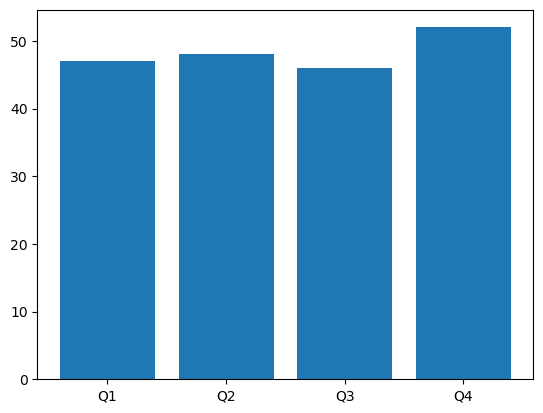

In [101]:
quarterly_recession = recession.groupby(recession['QUARTER'])['USRECQ'].sum() 
plt.bar(['Q1','Q2','Q3','Q4'], quarterly_recession)


The plot shows there is no particular quarter where recession occurs for a higher number of times. There is almost an equal amount of recession period in every quarter.

## GDP Trend based on Recession/Expansion Period

Text(0.5, 1.0, 'GDP based on Recession/Expansion period [Recession = Yellow, Expansion = Black]')

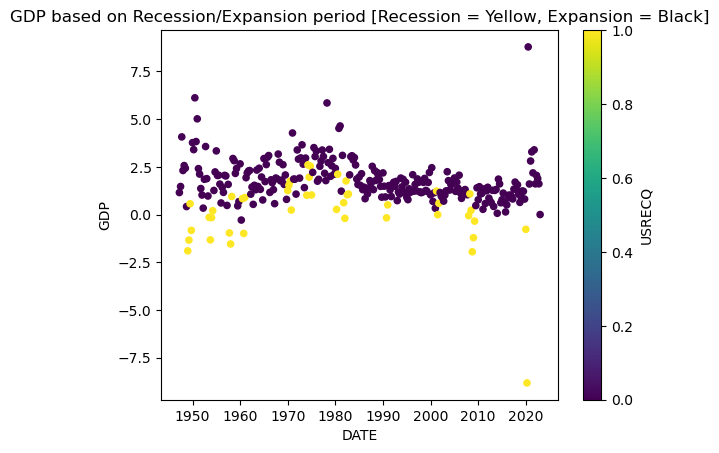

In [82]:
recession_gdp = recession[recession['DATE'] > datetime(1947, 1, 1)]
recession_gdp.head()
recession_gdp.plot.scatter(x = 'DATE', y = 'GDP', c= 'USRECQ',colormap='viridis')
plt.title('GDP based on Recession/Expansion period [Recession = Yellow, Expansion = Black]')

From the plot it is clear that for every recession period the GDP is lower than the average GDP for that year

## Yeild Curve

Text(0.5, 1.0, 'Yeild Curve of occurence of Recession based on GDP')

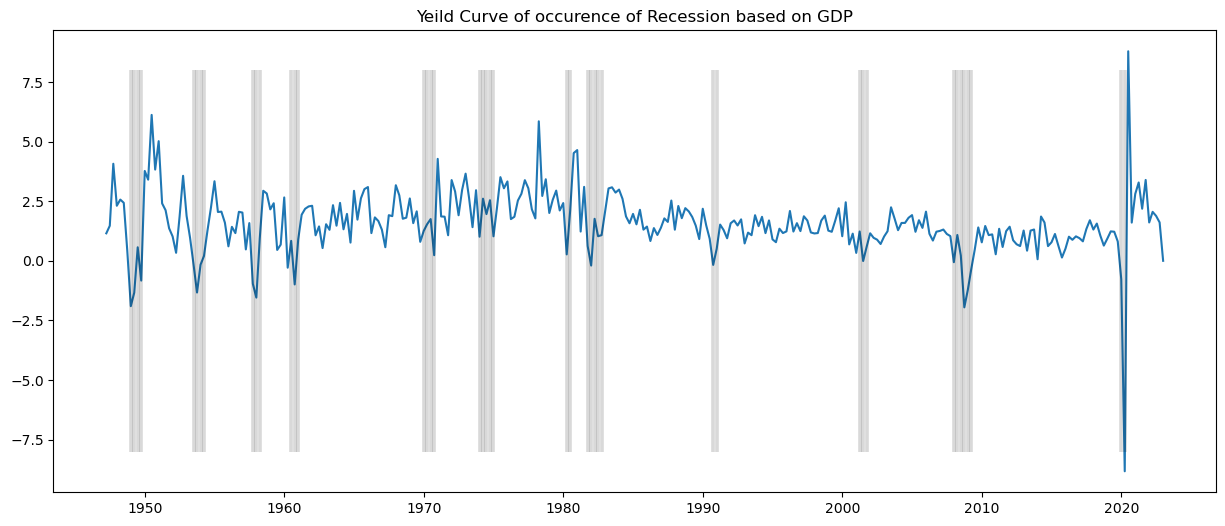

In [77]:
plt.figure(figsize=(15,6))
plt.plot(recession_gdp.DATE,recession_gdp.GDP)
#plt.vlines(x=[datetime(1947, 1, 1), datetime(2024, 1, 1)], y=recession_gdp.USRECQ, color='r', label='test lines')
for index, row in recession_gdp.iterrows():
    if row.USRECQ == 1:
        plt.vlines(x=row.DATE, ymin = -8, ymax = 8, color='k', alpha=0.15,linewidth = 2.6)
plt.title('Yeild Curve of occurence of Recession based on GDP')

### PPI and GDP

<AxesSubplot:xlabel='GDP', ylabel='PPI'>

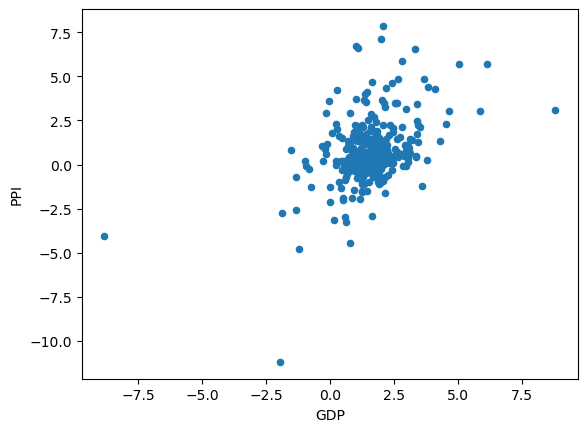

In [127]:
rec_ppi_gdp = recession[recession['DATE'] > datetime(1947, 1, 1)]
rec_ppi_gdp.head()
#recession_ppi.plot.scatter(x = 'DATE', y = 'PPI', c= 'STOCKS',colormap='PuBu')
rec_ppi_gdp.plot.scatter(x = 'GDP', y = 'PPI')#, c= '',colormap='PuBu')
#plt.title('GDP based on Recession/Expansion period [Recession = Yellow, Expansion = Black]')

### PPI and GDP

Text(0.5, 1.0, 'GDP based on Recession/Expansion period [Recession = Yellow, Expansion = Black]')

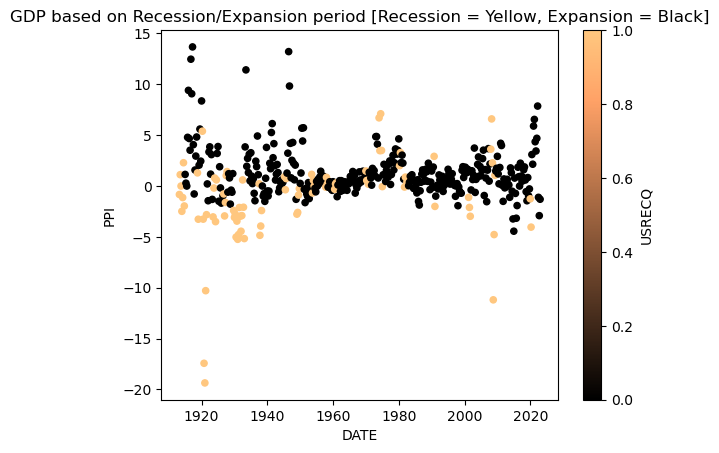

In [115]:
recession_ppi = recession[recession['DATE'] > datetime(1913, 1, 1)]
recession_ppi.plot.scatter(x = 'DATE', y = 'PPI', c= 'USRECQ',colormap='copper')
plt.title('GDP based on Recession/Expansion period [Recession = Yellow, Expansion = Black]')